In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
%matplotlib inline

# Task

The team wanted to find out if a certain email campaign works to incentivise the drivers to be more active in our platform.To do so we randomly divided the drivers in two groups A and B. Group B received an email informing drivers of when we expect high customer demand in the following week. Group A did not receive the email. Please find out about the effect of the campaign. Explain how you determine the impact and why you chose such a method to evaluate it.


# Exploration and hypothesis test

This part is intended to for an audiences interested in the statistics and methodology used. In another section further below, I have presented the results in a way that focuses on business impact and should be digestible for all stakeholders, regardless of their level of statistical literacy.  

In [2]:
#Clean up the data
dc=pd.read_csv("freenow_driver_campaign.csv")
dc.head()

,,freenow_driver_campaign
driver,rides_within_week,test_group
1,88,A
2,56,B
3,80,B
4,49,A


In [3]:
dc.reset_index(inplace=True)
dc.head()

,level_0,level_1,freenow_driver_campaign
0,driver,rides_within_week,test_group
1,1,88,A
2,2,56,B
3,3,80,B
4,4,49,A


In [4]:
dc=dc[dc['level_0']!='driver']

In [5]:
dc=dc.rename(columns={'level_0': 'driver', 'level_1': 'rides_within_week','freenow_driver_campaign':'test_group'})

In [6]:
dc['rides_within_week']=pd.to_numeric(dc["rides_within_week"])

In [7]:
#Quick check of the distributions shows group B is higher in measures of central tendency
dc.groupby('test_group')['rides_within_week'].describe()

,count,mean,std,min,25%,50%,75%,max
test_group,,,,,,,,
A,5000.0,50.0450,18.729600,0.0,37.0,50.0,63.0,120.0
B,5000.0,52.1168,18.952736,0.0,39.0,52.0,65.0,114.0


In [12]:
A=dc[dc['test_group']=='A']['rides_within_week']
B=dc[dc['test_group']=='B']['rides_within_week']

In [13]:
A = np.asarray(A, dtype='float')
B = np.asarray(B, dtype='float')

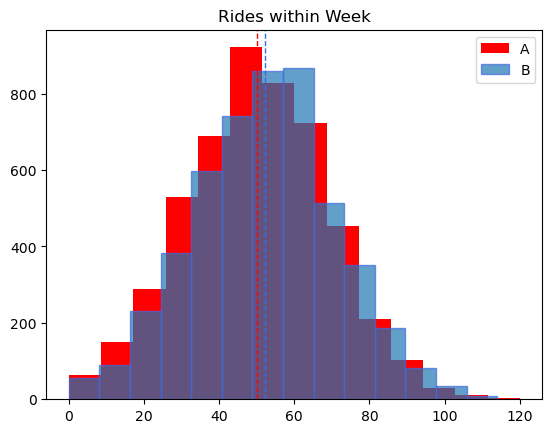

In [14]:
#Let's see the distributions plotted against each other

plt.hist(A, label='A', bins=14, color='red')
 
# plotting second histogram
plt.hist(B, label="B", bins=14, alpha=.7, edgecolor='royalblue')
plt.legend()
plt.axvline(A.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(B.mean(), color='royalblue', linestyle='dashed', linewidth=1)
plt.title('Rides within Week') 
# Showing the plot using plt.show()
plt.show()

In [15]:
my_pal = {"A": "red", "B": "royalblue"}

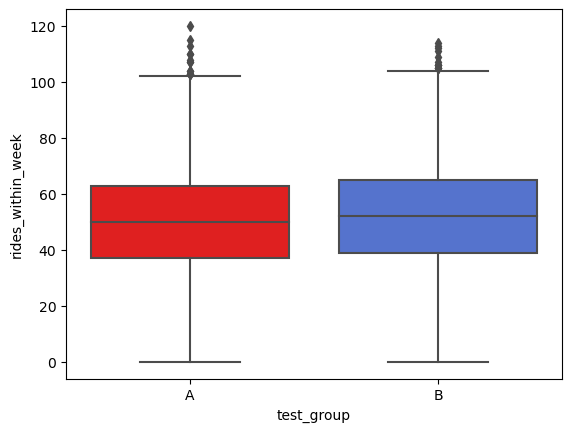

In [17]:
ax=sns.boxplot(data=dc,y='rides_within_week',x='test_group',palette=my_pal)

The difference between the 2 groups is minimal and difficult to confirm based on scrutinising charts and descriptive statistics. To validate, we use our hypothesis testing skills. Based on the following assumptions, we can use a 2 sample T test.

Samples are independent - True, as our drivers are not influenced by the no. of trips made by other drivers.

The data is normally distributed - True, as seen in the histogram above. If in doubt, can test with Shapiro-Wilk.

Variance of each group is equal - see test for equal variance below.

Users were randomly assigned to test & control groups - True. See task description.

In [23]:
# F Test for equal variance

#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test
f_test(A, B)

(0.9765920954696907, 0.7987877329992292)

P = 0.7987877329992292. As P >0.05, variance is equal & we can go ahead with our hypothesis test.

# Hypotheses

H0: Rides per week in each group are equal i.e., μ1 = μ2.

H1: Rides per week in each group are not equal i.e., μ1 ≠ μ2

Let's test for significance!

In [25]:
from scipy import stats as st

In [29]:
t_value,p_value=st.ttest_ind(A,B)

In [30]:
print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

Test statistic is -5.497970
p-value for two tailed test is 0.000000


<i> "When the P is low, the null must go!" </i>

As P<0.05, we can reject the null hypothesis and conclude that there is a difference between the 2 groups. This suggests that the email campaign was effective.

In [32]:
#Let's also check confidence intervals with pingouin package
import pingouin as pg

In [34]:
# two-sample ttest
result = pg.ttest(A,B,correction=True)
print(result)

              T          dof alternative         p-val           CI95%  \
T-test -5.49797  9996.598016   two-sided  3.936355e-08  [-2.81, -1.33]   

         cohen-d       BF10     power  
T-test  0.109959  7.897e+04  0.999798  


Our confidence interval shows that on average, drivers in group B did between 2.81 and 1.33 extra trips each than drivers in group A.

In [56]:
diff=round(100*((B.sum()-A.sum())/(A.sum())),2)

In [66]:
print('In total, Group B did %f' %diff, '% more rides per week than group A')

In total, Group B did 4.140000 % more rides per week than group A


# Results

There is a significant difference in rides per week between the 2 groups. 

On average, drivers in group B did between 1.3 and 2.8 extra trips in the week compared to drivers in group A. In total, this works out as group B doing 4.14% more rides than group A.

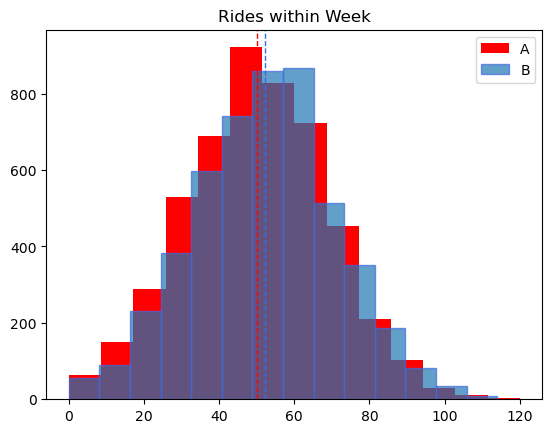

In [67]:
# plotting first histogram
plt.hist(A, label='A', bins=14, color='red')
 
# plotting second histogram
plt.hist(B, label="B", bins=14, alpha=.7, edgecolor='royalblue')
plt.legend()
plt.axvline(A.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(B.mean(), color='royalblue', linestyle='dashed', linewidth=1)
plt.title('Rides within Week') 
# Showing the plot using plt.show()
plt.show()

# Conclusion & Discussion



These results are promising and they suggest that the email campaign was effective. However, its important to note that the test only collected data on rides per week for one week. One week is a very short period within which to observe an effect. Usually we would like to collect at least 2 weeks worth of data to observe the effect over time and also to account for any effects of seasonality that might have occurred during the time observed. For example, if there had been a holiday during the week where data was being collected, our results may not have reflected the effect of this email campaign under more typical circumstances. 

# Recommendation
Considering the results and the low risk, low cost nature of an email campaign, I would advise a product manager to roll out this campaign but advise that in future, such a test should collect data over a longer period of time.